# Red Neuronal Recurrente

Crea una red neuronal para predecir el precio del dolar

In [20]:
# Librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Librerias para el preprocesamiento de los datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Librerías para crear la red neuronal
from keras.models import Sequential
from keras.layers import Input, Dense, SimpleRNN, LSTM, GRU

## 1. Leer la información del *dataset dolar.csv*

In [21]:
data = pd.read_csv('datasets/dolar.csv', header=None)
data

,0
0,17.0297
1,17.0492
2,17.0458
3,16.8987
4,16.8133
...,...
432,18.4082
433,18.3232
434,18.4312
435,18.4457


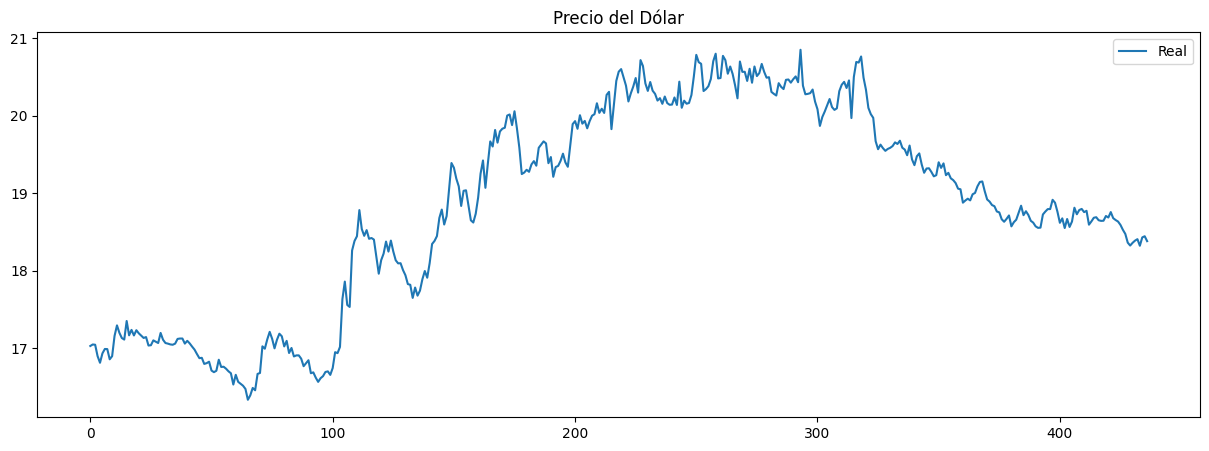

In [22]:
# Grafico de la serie de tiempo
plt.figure(figsize=(15, 5))
plt.title('Precio del Dólar')
plt.plot(data, label='Real')
plt.legend()

## 2. Crear secuencias temporales

In [23]:
# Normalización de los precios
prices = np.array(data[0])

normalizer = MinMaxScaler()
prices_norm = normalizer.fit_transform(prices.reshape(-1, 1))

# Crear datos de entrada y de salida, en base a secuencias
def create_sequences(data, time_steps=5):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_sequences(prices_norm, time_steps)

X = X.reshape((X.shape[0], X.shape[1], 1))

## 3. Crear Red Neuronal de Regresión

In [24]:
# Separar datos de entrada y de salida

X_nn = np.linspace(0, 1, len(prices_norm))

nn_model = Sequential([
    # Capa de entrada
    Input([1]),
    Dense(256, activation='relu'),

    # Capas ocultas
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),

    # Capa de salida
    Dense(1, activation='linear')
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn_model.fit(X_nn, prices_norm, epochs=100, batch_size=400)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.3652 - mae: 0.5341
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2403 - mae: 0.4185
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1078 - mae: 0.2577
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0654 - mae: 0.2109
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0938 - mae: 0.2289
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0599 - mae: 0.2084
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0575 - mae: 0.2062
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0645 - mae: 0.2115
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0626 - mae: 0.2097
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0558 - mae: 0.2052
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0541 - mae: 0.2053
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0568 - mae: 0.2082
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/ste

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


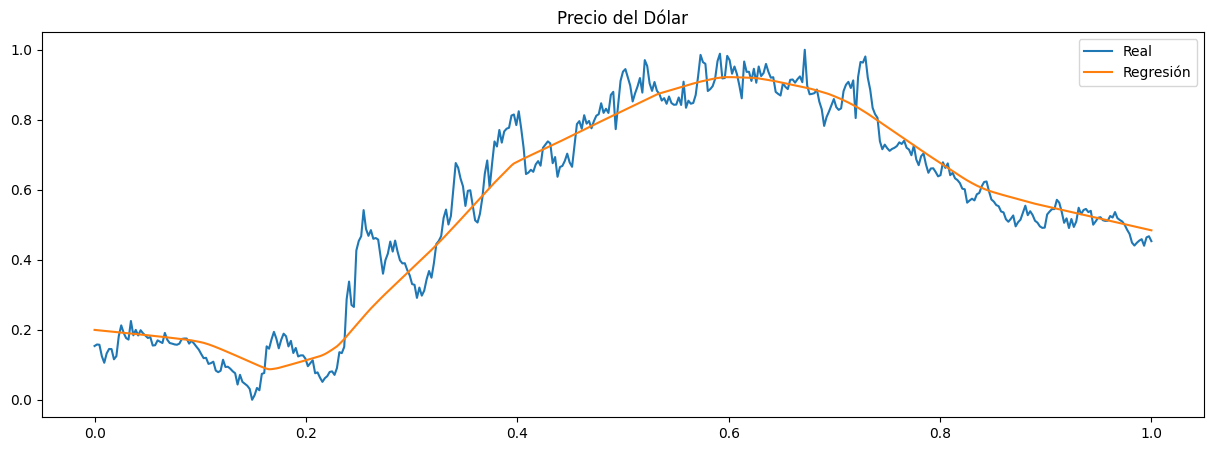

In [25]:
# Visualizar predicción
plt.figure(figsize=(15, 5))
plt.title('Precio del Dólar')
plt.plot(X_nn, prices_norm, label='Real')
plt.plot(X_nn, nn_model.predict(X_nn), label='Regresión')
plt.legend()

## 4. Crear Red Neuronal Recurrente Simple

In [26]:
rnn_model = Sequential([
    # Capa de entrada
    Input((time_steps, 1)),
    SimpleRNN(256, return_sequences=True),

    # Capas ocultas
    SimpleRNN(128),

    # Capa de salida
    Dense(1, activation='linear')
])

rnn_model.summary()

rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
rnn_model.fit(X, y, epochs=50, batch_size=400) 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 30, 256)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,457 (451.00 KB)

 Trainable params: 115,457 (451.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.6449 - mae: 0.6874
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1848 - mae: 0.3677 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0609 - mae: 0.2055 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1771 - mae: 0.3369 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1027 - mae: 0.2800 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1232 - mae: 0.3098 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0525 - mae: 0.1904 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0398 - mae: 0.1659 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0379 - mae: 0.1553 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0086 - mae: 0.0804 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0128 - mae: 0.1003 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0202 - mae: 0.1150 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


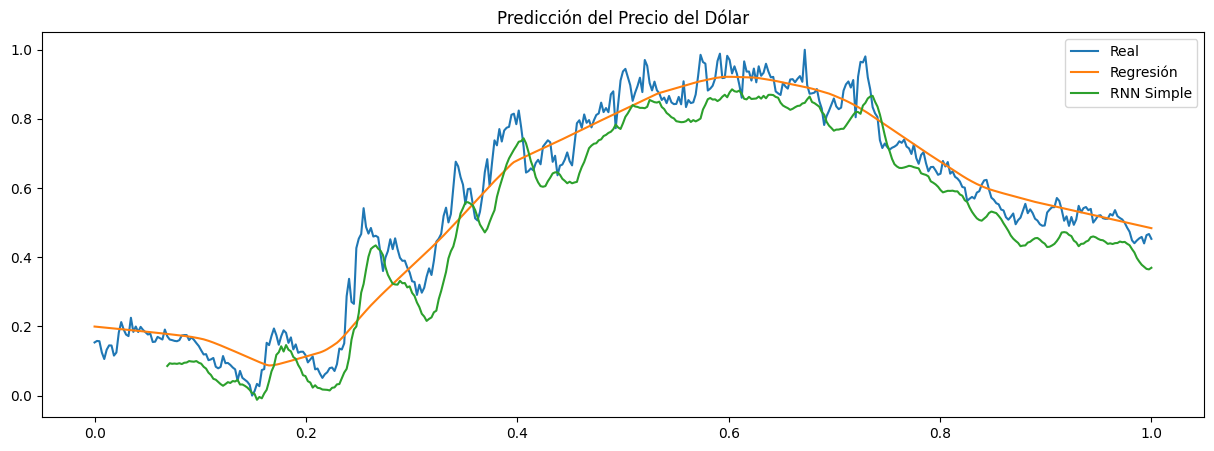

In [27]:
# Visualizar predicción
plt.figure(figsize=(15, 5))
plt.title('Predicción del Precio del Dólar')
plt.plot(X_nn, prices_norm, label='Real')
plt.plot(X_nn, nn_model.predict(X_nn), label='Regresión')
plt.plot(X_nn[time_steps:], rnn_model.predict(X), label='RNN Simple')
plt.legend()